In [9]:
from modsim import *
%matplotlib inline
import matplotlib.pyplot as plt



http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [10]:
degrees= UNITS.degrees

In [267]:
mkm= 1/1000

sechour= (1/60)**2 

mass_sun= 1.989e30 
G= 6.673e-11 * mkm**3 
mass_toast= .5
S_B_const= 5.67e-8 
temp_S= 5772 
area_t= .01 *mkm**2
r_s= 695770 *1000 *mkm
Pow_s= 3.9e26 
Q_b= .008/273 




num_G = G* mass_sun   

num_G

dist_init= 5e8

VXinit= sqrt(2*num_G/dist_init)

VXinit


 

#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

23.041351522859937

In [440]:

condition= Condition(x0= 0, y0= -5e8, velocity= 18, angle = 30*degrees, duration= 1e8, T0= 0 )

In [444]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    
    
    vx, vy = pol2cart(theta, velocity)
    
    init= State(x=x0, y=y0, vx= vx, vy= vy, temp=T0)
    area_toast = area_t 
    
    ts= linspace(0, duration, 100)
    
    return System(init= init, mass= mass_toast, area_t= area_t, T= T0, Q_b= Q_b, ts= ts)

system= make_system(condition) 




In [454]:
def slope_func(state, t, system):
    x, y, vx, vy, temp = state
    
    unpack(system)
    dist= sqrt(x**2+y**2)
    P= Vector(-x, -y) 
    V= Vector(vx, vy) 
    tan_vect= Vector((-y/dist), (x/ dist))
    tan_v= tan_vect/tan_vect.mag
    #print(tan_v)
    
    xdir= -x/ dist
    ydir= -y/dist
    w= V.proj(tan_v)
    

    F_grav= G* mass_sun *mass_toast/ (dist)**2
    
    a_grav= Vector(xdir, ydir) *((F_grav)/mass_toast) 
    a_cent= Vector(-xdir, -ydir) *(w.mag**2)/dist
    
    #print(a_cent)
    ax= a_grav.x + a_cent.x
    ay= a_grav.y + a_cent.y
    
    
    rad_on_toast= t * Pow_s * r_s**2/ P.mag**2 
    temp_toast= rad_on_toast/ Q_b / mass_toast -temp
    
    
    return vx, vy, ax, ay, temp_toast
    
    
                     
    
    
slope_func(system.init,1,system)
    

(<Quantity(15.588457268119896, 'dimensionless')>,
 <Quantity(8.999999999999998, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(4.490387999999998e-08, 'dimensionless')>,
 <Quantity(5.154168971706299e+25, 'dimensionless')>)

In [455]:

run_odeint(system, slope_func)

In [456]:
system.results

,x,y,vx,vy,temp
0.000000e+00,0.000000e+00,-5.000000e+08,15.588457,9.000000,0.000000e+00
1.010101e+06,1.574569e+07,-4.908874e+08,15.587814,9.041628,5.395760e+31
2.020202e+06,3.149020e+07,-4.817367e+08,15.586191,9.075464,1.116920e+32
3.030303e+06,4.723279e+07,-4.725559e+08,15.584100,9.101093,1.731254e+32
4.040404e+06,6.297326e+07,-4.633535e+08,15.582104,9.118246,2.380947e+32
5.050505e+06,7.871202e+07,-4.541381e+08,15.580805,9.126828,3.063396e+32
6.060606e+06,9.445008e+07,-4.449183e+08,15.580808,9.126952,3.774944e+32
7.070707e+06,1.101890e+08,-4.357026e+08,15.582692,9.118963,4.510832e+32
8.080808e+06,1.259311e+08,-4.264987e+08,15.586967,9.103449,5.265206e+32
9.090909e+06,1.416788e+08,-4.173140e+08,15.594034,9.081243,6.031194e+32


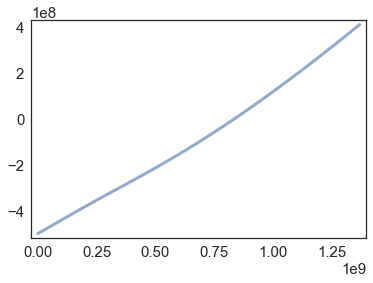

In [457]:
plot(system.results.x, system.results.y, )
#plt.axis([-5e8, 5e8, -5e8, 1.2e10])

In [408]:
A= Vector(1, 3)

B= Vector(2, -6)

A.proj(B.hat())

<Quantity([-0.8  2.4], 'dimensionless')>